## Lecture Notes: Pandas Basics

____

Goals:

Introduce Pandas and key Pandas concepts. By the end, you should understand:

* Create ad manipulate Pandas Series and DataFrames
* Use essential functions to filter, sort and summarize data
* Differentiate between .iloc and .loc for indexing and selecting data
* Handle real-world datasets using CSV files

____

**Create a new environment**

Begin by creating a new environment, let's call it *databehandling*.

In your command, type the following:

        conda create --name databehandling python=3.12

After it's created, active it and run the following to install some necesarry libraries for this course

        pip install numpy pandas openpyxl ipykernel seaborn plotly_express nbformat

In [1]:
import random

import numpy as np
import pandas as pd

_____

## Pandas Series

A Pandas Series is a one-dimensional array-like object that can hold any data type (integers, floats, strings, etc etc.)

**Creating a Series**

You can create a Series from a list, an array, or a dictionary.

In [2]:
# create a Series using a list

numbers_list = [x for x in range(30,40)]
print(numbers_list)

[30, 31, 32, 33, 34, 35, 36, 37, 38, 39]


In [3]:
my_first_series = pd.Series(numbers_list) # create a Series from the list

In [4]:
my_first_series

0    30
1    31
2    32
3    33
4    34
5    35
6    36
7    37
8    38
9    39
dtype: int64

In [5]:
isinstance(my_first_series, pd.Series)

True

Here are some basic class methods for Series:

In [6]:
print(f'Seriens minsta värde  : {my_first_series.min()}')
print(f'Seriens största värde : {my_first_series.max()}')
print(f'Seriens medelvärde    : {my_first_series.mean()}')


Seriens minsta värde  : 30
Seriens största värde : 39
Seriens medelvärde    : 34.5


**Interaction with other series**

How does a Series object interact with other Series objects under e.g., addition or mulitplication?

In [7]:
list_one = [1,2,3]
list_two = [5,6,7]

list_one + list_two

[1, 2, 3, 5, 6, 7]

In [10]:
series_one = pd.Series(list_one)
series_two = pd.Series(list_two)

# elementwise addition
series_one + series_two

0     6
1     8
2    10
dtype: int64

In [12]:
# elementwise multiplication
series_one * series_two

0     5
1    12
2    21
dtype: int64

In [15]:
# elementwise division
series_one / series_two

0    0.200000
1    0.333333
2    0.428571
dtype: float64

We can extract individual elements from a Series by simple indexing

In [53]:
my_first_series[1]

np.int64(31)

We can also do extract multiple elements from a Series

In [56]:
my_first_series[:4]

0    30
1    31
2    32
3    33
dtype: int64

Read more about these operations and methods in the documentation!

____

## Pandas DataFrame

A dataframe is a 2D labeled data structure in Pandas, similar to a table or a spreadsheat.

Each column can hold different types of data (integers, floats, strings etc).

Let's create our first DataFrame

In [37]:
names = ['Amir', 'Sawash', 'Rozann', 'Ali']
age = [1.5, 4, 28, 34]
eye_color = ['blue', 'brown', 'green', 'brown']

# we can very easily create DataFrames from dictionaries

family_dict = {'name': names, 
               'age': age, 
               'eye color': eye_color}

family_dict

{'name': ['Amir', 'Sawash', 'Rozann', 'Ali'],
 'age': [1.5, 4, 28, 34],
 'eye color': ['blue', 'brown', 'green', 'brown']}

In [38]:
# _df is standard naming convention to signify that it's a DataFrame

family_df = pd.DataFrame(family_dict) # create a DataFrame from the dictionary

family_df

,name,age,eye color
0,Amir,1.5,blue
1,Sawash,4.0,brown
2,Rozann,28.0,green
3,Ali,34.0,brown


In [31]:
isinstance(family_df, pd.DataFrame)

True

In [32]:
# an important method is .info(), it gives us general meta-data about the contents of the dataframe
# note that Dtype "object" signifies either "string" or mixed type column (e.g., strings and integers)

family_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   name       4 non-null      object 
 1   age        4 non-null      float64
 2   eye_color  4 non-null      object 
dtypes: float64(1), object(2)
memory usage: 228.0+ bytes


We can select specific columns from our DataFrame using the column names.

In [39]:
# Note that the returned column is given as a Series object!

family_df['name']

0      Amir
1    Sawash
2    Rozann
3       Ali
Name: name, dtype: object

We can also get to individual columns by calling on their names as attributes.

In [40]:
family_df.name

0      Amir
1    Sawash
2    Rozann
3       Ali
Name: name, dtype: object

In [42]:

# note that calling on columns using the attribute technique is prone to errors, specifically if we e.g., have blanc spaces in the column names
family_df.eye color

SyntaxError: invalid syntax (3928325688.py, line 2)

In [43]:
family_df['eye color']

0     blue
1    brown
2    green
3    brown
Name: eye color, dtype: object

We can index several columns at once by passing a list of column names to the DataFrame.

In [45]:
family_df[['name', 'eye color']]

,name,eye color
0,Amir,blue
1,Sawash,brown
2,Rozann,green
3,Ali,brown


_____

## Further indexing

In Pandas, selecting specific rows and columns is essential for analyzing data. Pandas offers two primary methods to do this:

.iloc and .loc

In [58]:
family_df[0] # this does not work for a DataFrame

KeyError: 0

In [60]:
# let's create some new data

data = {
        'Name' : ['Alice', 'Bob', 'Charlie', 'David', 'Eva', 'Frank', 'Grace', 'Helen', 'Ian'],
        'Age' : [25, 30, 35, 40, 22, 29, 28, 22, 31], 
        'Salary': [50000, 60000, 70000, 80000, 52000, 62000, 75000, 55000, 100000]
        }

df = pd.DataFrame(data)

df

,Name,Age,Salary
0,Alice,25,50000
1,Bob,30,60000
2,Charlie,35,70000
3,David,40,80000
4,Eva,22,52000
5,Frank,29,62000
6,Grace,28,75000
7,Helen,22,55000
8,Ian,31,100000


Before proceeding, note that we can get access to Series methods very simply by e.g., first querying on a given column

In [63]:
print(df['Salary'].mean())

67111.11111111111


**.iloc[] - Position-based Indexing**

Use .iloc[] to select data based on the position of rows and columns.

The general syntax is

.iloc[row_indexer, column_indexer]


In [65]:
# if we only provide one index, it'll be understood that it is the row index

df.iloc[0]   # select the first row

Name      Alice
Age          25
Salary    50000
Name: 0, dtype: object

In [67]:
# we can use slicing to select multiple rows

df.iloc[1:5] # rows 1 to 4 (5 not included)

,Name,Age,Salary
1,Bob,30,60000
2,Charlie,35,70000
3,David,40,80000
4,Eva,22,52000


In [69]:
my_slice_df = df.iloc[1:5]

my_slice_df

,Name,Age,Salary
1,Bob,30,60000
2,Charlie,35,70000
3,David,40,80000
4,Eva,22,52000


In [72]:
print(df.iloc[0, 2]) # select the value in the 0th row and 2nd column
print(df.iloc[5, 1]) # select the value in the 5th row and 1st column

50000
29


We can also give a list of slicers for both rows and columns

In [74]:
df.iloc[0:3, 0:2] # rows 0 to 2 (3 not included), columns 0 to 1 (2 not included)

,Name,Age
0,Alice,25
1,Bob,30
2,Charlie,35


In [77]:
df.iloc[2:4, 1:] # 2:4 means rows 2 to 3 (4 not included), 1: means all columns from column 1 

,Age,Salary
2,35,70000
3,40,80000


In [80]:
df.iloc[1:4, :] # : means all columns

,Name,Age,Salary
1,Bob,30,60000
2,Charlie,35,70000
3,David,40,80000


We can also give a list of either rows/columns we want to index


In [81]:
df.iloc[[0, 2, 4], [0, 2]] # rows 0, 2, 4, columns 0, 2

,Name,Salary
0,Alice,50000
2,Charlie,70000
4,Eva,52000


**loc**

Use .loc[] to select data based on labels (row index or column names).

In [84]:
data = {
        'Name' : ['Alice', 'Bob', 'Charlie', 'David', 'Eva', 'Frank', 'Grace', 'Helen', 'Ian'],
        'Age' : [25, 30, 35, 40, 22, 29, 28, 22, 31], 
        'Salary': [50000, 60000, 70000, 80000, 52000, 62000, 75000, 55000, 100000]
        }

df = pd.DataFrame(data, index=['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i']) # we can provie our own index here, if we'd like

df

,Name,Age,Salary
a,Alice,25,50000
b,Bob,30,60000
c,Charlie,35,70000
d,David,40,80000
e,Eva,22,52000
f,Frank,29,62000
g,Grace,28,75000
h,Helen,22,55000
i,Ian,31,100000


Note that even though we have a custom index, .iloc still works

In [85]:
df.iloc[1:4, 0:2]

,Name,Age
b,Bob,30
c,Charlie,35
d,David,40


The syntax for .loc is the same as for .iloc, but instead of using integer indexes, we use labels.

The general syntax is 

.loc[row_label, column_label]

In [89]:
df.loc['e'] # select the row with label 'e'

Name        Eva
Age          22
Salary    52000
Name: e, dtype: object

In [91]:
print(df.loc['b', 'Age']) # select the element at row 'b' and column 'Age'

30


In [92]:
df.loc[['a', 'c', 'e'], ['Name', 'Salary']] # select rows 'a', 'c', 'e' and columns 'Name', 'Salary'

,Name,Salary
a,Alice,50000
c,Charlie,70000
e,Eva,52000


In [95]:
df.loc['a':'c'] # slicing works for labels too, under very strict conditions - but it always works for .iloc

,Name,Age,Salary
a,Alice,25,50000
b,Bob,30,60000
c,Charlie,35,70000


_____

## Masking

Masking is a powerful feature in Pandas that allows you to filter data based on certain conditions.

Masking is often used to filter data, perform calculations or create subsets of data for further analysis.

In [96]:
family_df

,name,age,eye color
0,Amir,1.5,blue
1,Sawash,4.0,brown
2,Rozann,28.0,green
3,Ali,34.0,brown


In [109]:
# the above df has 4 rows, so let's create a list of booleans of the same size

my_mask = [True, False, True, False]

family_df[my_mask] # the rows in which the mask is True are returned

,name,age,eye color
0,Amir,1.5,blue
2,Rozann,28.0,green


In [105]:
# we have extreme flexibility here, and can use any condition we want to create our mask

eye_color_mask = [color == 'brown' for color in family_df['eye color']]
print(eye_color_mask)

family_df[eye_color_mask]

[False, True, False, True]


,name,age,eye color
1,Sawash,4.0,brown
3,Ali,34.0,brown


Series and DataFrames have built-in support for creating masks

In [106]:
family_df['eye color'] == 'brown' # elemetwise comparison, returns a Series of booleans

0    False
1     True
2    False
3     True
Name: eye color, dtype: bool

In [107]:
my_color_mask = family_df['eye color'] == 'brown'

family_df[my_color_mask]

,name,age,eye color
1,Sawash,4.0,brown
3,Ali,34.0,brown


In [110]:
# if we feel very confident, we can create and provide the mask directly in the index (not recommended though)

family_df[family_df['eye color'] == 'brown']

,name,age,eye color
1,Sawash,4.0,brown
3,Ali,34.0,brown


In [113]:
family_df[family_df['age'] > 25]

,name,age,eye color
2,Rozann,28.0,green
3,Ali,34.0,brown


In [123]:
age_mask = family_df['age'] > 25

adults_df = family_df[age_mask]

adults_df

,name,age,eye color
2,Rozann,28.0,green
3,Ali,34.0,brown


In [124]:
adults_df = adults_df.reset_index(drop=True) # 0, 2 are the original indices of the rows that were selected

In [125]:
adults_df

,name,age,eye color
0,Rozann,28.0,green
1,Ali,34.0,brown


We can combine filters too!

Only rows that satisfy all masks will then be returned.

In [126]:
print(age_mask)
print(eye_color_mask)

0    False
1    False
2     True
3     True
Name: age, dtype: bool
[False, True, False, True]


In [139]:
family_df[age_mask & eye_color_mask] # only the last row satisfy both masks

C:\Users\Leyla\AppData\Local\Temp\ipykernel_97600\2469766465.py:1: FutureWarning: Logical ops (and, or, xor) between Pandas objects and dtype-less sequences (e.g. list, tuple) are deprecated and will raise in a future version. Wrap the object in a Series, Index, or np.array before operating instead.
  family_df[age_mask & eye_color_mask] # only the last row satisfy both masks


,name,age,eye color
3,Ali,34.0,brown


Just a little bit more fun

In [129]:
short_names_mask = [len(name) < 4 for name in df['Name']]

df[short_names_mask]

,Name,Age,Salary
b,Bob,30,60000
e,Eva,22,52000
i,Ian,31,100000


BTW, you can also NEGATE masks - i.e., we can get the opposite of the mask

In [135]:
family_df[~age_mask]

,name,age,eye color
0,Amir,1.5,blue
1,Sawash,4.0,brown


_____

## Read excel

In [142]:
calories_df = pd.read_excel('../data/calories.xlsx')

calories_df.head() # shows the first 5 rows of the DataFrame

,FoodCategory,FoodItem,per100grams,Cals_per100grams,KJ_per100grams
0,CannedFruit,Applesauce,100g,62 cal,260 kJ
1,CannedFruit,Canned Apricots,100g,48 cal,202 kJ
2,CannedFruit,Canned Blackberries,100g,92 cal,386 kJ
3,CannedFruit,Canned Blueberries,100g,88 cal,370 kJ
4,CannedFruit,Canned Cherries,100g,54 cal,227 kJ


In [143]:
calories_df.head(10) # default is 5, but we can change it

,FoodCategory,FoodItem,per100grams,Cals_per100grams,KJ_per100grams
0,CannedFruit,Applesauce,100g,62 cal,260 kJ
1,CannedFruit,Canned Apricots,100g,48 cal,202 kJ
2,CannedFruit,Canned Blackberries,100g,92 cal,386 kJ
3,CannedFruit,Canned Blueberries,100g,88 cal,370 kJ
4,CannedFruit,Canned Cherries,100g,54 cal,227 kJ
5,CannedFruit,Canned Cranberries,100g,178 cal,748 kJ
6,CannedFruit,Canned Crushed Pineapple,100g,53 cal,223 kJ
7,CannedFruit,Canned Figs,100g,107 cal,449 kJ
8,CannedFruit,Canned Fruit Cocktail,100g,81 cal,340 kJ
9,CannedFruit,Canned Fruit Salad,100g,50 cal,210 kJ


In [145]:
calories_df.tail() # shows by default the last 5 rows, but can be changed aswell

,FoodCategory,FoodItem,per100grams,Cals_per100grams,KJ_per100grams
2220,Spreads,Sunflower Butter,100g,617 cal,2591 kJ
2221,Spreads,Tapenade,100g,233 cal,979 kJ
2222,Spreads,Unsalted Butter,100g,717 cal,3011 kJ
2223,Spreads,Vegemite,100g,180 cal,756 kJ
2224,Spreads,Wild Honey,100g,286 cal,1201 kJ


In [146]:
calories_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2225 entries, 0 to 2224
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   FoodCategory      2225 non-null   object
 1   FoodItem          2225 non-null   object
 2   per100grams       2225 non-null   object
 3   Cals_per100grams  2225 non-null   object
 4   KJ_per100grams    2225 non-null   object
dtypes: object(5)
memory usage: 87.0+ KB


In [151]:
# see how many unique values a given column has

calories_df['FoodCategory'].nunique() # nunique stands for number of unique

44

In [152]:
# print the unique values of a given column

print(calories_df['FoodCategory'].unique())

['CannedFruit' 'Fruits' 'Tropical&ExoticFruits' 'PotatoProducts'
 'Vegetables' 'FastFood' 'Pizza' 'Cheese' 'CreamCheese'
 'Milk&DairyProducts' 'SlicedCheese' 'Yogurt' 'Beef&Veal'
 'ColdCuts&LunchMeat' 'Meat' 'Offal&Giblets' 'Pork' 'Poultry&Fowl'
 'Sausage' 'Venison&Game' 'Cakes&Pies' 'Candy&Sweets' 'IceCream'
 '(Fruit)Juices' 'AlcoholicDrinks&Beverages' 'Beer'
 'Non-AlcoholicDrinks&Beverages' 'Soda&SoftDrinks' 'Wine' 'CerealProducts'
 'Oatmeal,Muesli&Cereals' 'Pasta&Noodles' 'Dishes&Meals' 'Soups' 'Legumes'
 'Nuts&Seeds' 'Oils&Fats' 'VegetableOils' 'BakingIngredients'
 'Fish&Seafood' 'Herbs&Spices' 'Pastries,Breads&Rolls' 'Sauces&Dressings'
 'Spreads']


In [153]:
# see the amount of times each value appears

calories_df['FoodCategory'].value_counts()

FoodCategory
BakingIngredients                95
Cakes&Pies                       91
Herbs&Spices                     90
Beer                             85
Candy&Sweets                     81
Dishes&Meals                     78
Pastries,Breads&Rolls            78
Oatmeal,Muesli&Cereals           76
FastFood                         72
Vegetables                       63
Legumes                          62
Fish&Seafood                     60
Sauces&Dressings                 54
Fruits                           54
Cheese                           53
Soups                            52
Non-AlcoholicDrinks&Beverages    51
AlcoholicDrinks&Beverages        48
Sausage                          47
(Fruit)Juices                    46
Meat                             46
IceCream                         45
Soda&SoftDrinks                  45
CerealProducts                   44
Pizza                            43
Pasta&Noodles                    40
Yogurt                           40
Tropical&Exotic

In [155]:
calories_df.iloc[224]

FoodCategory                        FastFood
FoodItem            Arby’s Grand Turkey Club
per100grams                             100g
Cals_per100grams                     210 cal
KJ_per100grams                        882 kJ
Name: 224, dtype: object

In [156]:
calories_df.iloc[224:229, 3:5]

,Cals_per100grams,KJ_per100grams
224,210 cal,882 kJ
225,208 cal,874 kJ
226,234 cal,983 kJ
227,234 cal,983 kJ
228,212 cal,890 kJ


In [157]:
calories_df[calories_df['FoodCategory']=='FastFood']

,FoodCategory,FoodItem,per100grams,Cals_per100grams,KJ_per100grams
224,FastFood,Arby’s Grand Turkey Club,100g,210 cal,882 kJ
225,FastFood,Arby’s Reuben,100g,208 cal,874 kJ
226,FastFood,Arby’s Roast Beef Classic,100g,234 cal,983 kJ
227,FastFood,Arby’s Roast Beef Max,100g,234 cal,983 kJ
228,FastFood,BBQ Rib,100g,212 cal,890 kJ
...,...,...,...,...,...
291,FastFood,Wendy’s Son of Baconator,100g,321 cal,1348 kJ
292,FastFood,Whopper,100g,231 cal,970 kJ
293,FastFood,Zinger,100g,256 cal,1075 kJ
294,FastFood,Zinger Burger,100g,256 cal,1075 kJ


_____

## Rename columns

In [158]:
calories_df

,FoodCategory,FoodItem,per100grams,Cals_per100grams,KJ_per100grams
0,CannedFruit,Applesauce,100g,62 cal,260 kJ
1,CannedFruit,Canned Apricots,100g,48 cal,202 kJ
2,CannedFruit,Canned Blackberries,100g,92 cal,386 kJ
3,CannedFruit,Canned Blueberries,100g,88 cal,370 kJ
4,CannedFruit,Canned Cherries,100g,54 cal,227 kJ
...,...,...,...,...,...
2220,Spreads,Sunflower Butter,100g,617 cal,2591 kJ
2221,Spreads,Tapenade,100g,233 cal,979 kJ
2222,Spreads,Unsalted Butter,100g,717 cal,3011 kJ
2223,Spreads,Vegemite,100g,180 cal,756 kJ


In [163]:
calories_df.rename(columns={"FoodItem":"Food"}, inplace=True) # inplace=True means that the changes are made to the original DataFrame

In [169]:
calories_df

,FoodCategory,Food,per100grams,Cals_per100grams,KJ_per100grams
0,CannedFruit,Applesauce,100g,62 cal,260 kJ
1,CannedFruit,Canned Apricots,100g,48 cal,202 kJ
2,CannedFruit,Canned Blackberries,100g,92 cal,386 kJ
3,CannedFruit,Canned Blueberries,100g,88 cal,370 kJ
4,CannedFruit,Canned Cherries,100g,54 cal,227 kJ
...,...,...,...,...,...
2220,Spreads,Sunflower Butter,100g,617 cal,2591 kJ
2221,Spreads,Tapenade,100g,233 cal,979 kJ
2222,Spreads,Unsalted Butter,100g,717 cal,3011 kJ
2223,Spreads,Vegemite,100g,180 cal,756 kJ


____

## A bit of data cleaning

We will very often need to handle and manipulate data in dataframes, e.g.,

change column names, change element values, create new columns, handle missing data, alter values etc etc.

In [172]:
calories_df.head()

,FoodCategory,Food,per100grams,Cals_per100grams,KJ_per100grams
0,CannedFruit,Applesauce,100g,62 cal,260 kJ
1,CannedFruit,Canned Apricots,100g,48 cal,202 kJ
2,CannedFruit,Canned Blackberries,100g,92 cal,386 kJ
3,CannedFruit,Canned Blueberries,100g,88 cal,370 kJ
4,CannedFruit,Canned Cherries,100g,54 cal,227 kJ


In [175]:
# we can index elements in a string Series by using .str[]

calories_df['Cals_per100grams'].str[:4]

0       62 c
1       48 c
2       92 c
3       88 c
4       54 c
        ... 
2220    617 
2221    233 
2222    717 
2223    180 
2224    286 
Name: Cals_per100grams, Length: 2225, dtype: object

In [183]:
# we can convert datatype to int (if all elements allow it)

calories_df['Cals_per100grams'].str[:2].astype(int)

0       62
1       48
2       92
3       88
4       54
        ..
2220    61
2221    23
2222    71
2223    18
2224    28
Name: Cals_per100grams, Length: 2225, dtype: int64

In [188]:
calories_df['cals/100g in integers'] = pd.Series([x.split()[0] for x in calories_df['Cals_per100grams']]).astype(int)

In [189]:
calories_df

,FoodCategory,Food,per100grams,Cals_per100grams,KJ_per100grams,cals/100g in integers
0,CannedFruit,Applesauce,100g,62 cal,260 kJ,62
1,CannedFruit,Canned Apricots,100g,48 cal,202 kJ,48
2,CannedFruit,Canned Blackberries,100g,92 cal,386 kJ,92
3,CannedFruit,Canned Blueberries,100g,88 cal,370 kJ,88
4,CannedFruit,Canned Cherries,100g,54 cal,227 kJ,54
...,...,...,...,...,...,...
2220,Spreads,Sunflower Butter,100g,617 cal,2591 kJ,617
2221,Spreads,Tapenade,100g,233 cal,979 kJ,233
2222,Spreads,Unsalted Butter,100g,717 cal,3011 kJ,717
2223,Spreads,Vegemite,100g,180 cal,756 kJ,180


_____

## Sort dataframe

In [190]:
calories_df.sort_values(by='cals/100g in integers') # by default, ascending=True

,FoodCategory,Food,per100grams,Cals_per100grams,KJ_per100grams,cals/100g in integers
1313,Soda&SoftDrinks,TaB,100ml,0 cal,0 kJ,0
1050,(Fruit)Juices,Chamomile Tea,100ml,0 cal,0 kJ,0
1277,Soda&SoftDrinks,Coke Zero,100ml,0 cal,0 kJ,0
2040,Herbs&Spices,Sea Salt,100g,0 cal,0 kJ,0
2038,Herbs&Spices,Salt,100g,0 cal,0 kJ,0
...,...,...,...,...,...,...
1800,VegetableOils,Salmon Oil,100ml,911 cal,3826 kJ,911
1789,VegetableOils,Menhaden Oil,100ml,911 cal,3826 kJ,911
1808,VegetableOils,Wheat Germ Oil,100ml,929 cal,3902 kJ,929
1751,Oils&Fats,Cod Liver Oil,100ml,1000 cal,4200 kJ,1000


In [191]:
calories_df.sort_values(by='cals/100g in integers', ascending=False)

,FoodCategory,Food,per100grams,Cals_per100grams,KJ_per100grams,cals/100g in integers
1621,Soups,Goulash,100g,1009 cal,4238 kJ,1009
1751,Oils&Fats,Cod Liver Oil,100ml,1000 cal,4200 kJ,1000
1808,VegetableOils,Wheat Germ Oil,100ml,929 cal,3902 kJ,929
1800,VegetableOils,Salmon Oil,100ml,911 cal,3826 kJ,911
1789,VegetableOils,Menhaden Oil,100ml,911 cal,3826 kJ,911
...,...,...,...,...,...,...
1282,Soda&SoftDrinks,Diet Sunkist,100ml,0 cal,0 kJ,0
1280,Soda&SoftDrinks,Diet Dr. Pepper,100ml,0 cal,0 kJ,0
1286,Soda&SoftDrinks,Fanta Zero,100ml,0 cal,0 kJ,0
1050,(Fruit)Juices,Chamomile Tea,100ml,0 cal,0 kJ,0


In [193]:
calories_df.iloc[1621]

FoodCategory                Soups
Food                      Goulash
per100grams                  100g
Cals_per100grams         1009 cal
KJ_per100grams            4238 kJ
cals/100g in integers        1009
Name: 1621, dtype: object

In [194]:
calories_df

,FoodCategory,Food,per100grams,Cals_per100grams,KJ_per100grams,cals/100g in integers
0,CannedFruit,Applesauce,100g,62 cal,260 kJ,62
1,CannedFruit,Canned Apricots,100g,48 cal,202 kJ,48
2,CannedFruit,Canned Blackberries,100g,92 cal,386 kJ,92
3,CannedFruit,Canned Blueberries,100g,88 cal,370 kJ,88
4,CannedFruit,Canned Cherries,100g,54 cal,227 kJ,54
...,...,...,...,...,...,...
2220,Spreads,Sunflower Butter,100g,617 cal,2591 kJ,617
2221,Spreads,Tapenade,100g,233 cal,979 kJ,233
2222,Spreads,Unsalted Butter,100g,717 cal,3011 kJ,717
2223,Spreads,Vegemite,100g,180 cal,756 kJ,180


____

## Read excel with several sheets and choose header column

In [195]:
population_df = pd.read_excel('../data/komtopp50_2020.xlsx', sheet_name='Totalt', header=6)

population_df

,2020,2019,Unnamed: 2,2020.1,2019.1,%
0,83,84,Ale,31868,31402,1.483982
1,64,64,Alingsås,41602,41420,0.439401
2,123,123,Alvesta,20224,20134,0.447005
3,255,255,Aneby,6821,6848,-0.394276
4,169,167,Arboga,14039,14087,-0.340740
...,...,...,...,...,...,...
285,54,55,Österåker,46644,45574,2.347830
286,116,115,Östhammar,22251,22250,0.004494
287,160,159,Östra Göinge,15017,15007,0.066636
288,284,284,Överkalix,3289,3315,-0.784314


In [198]:
sorted_df = population_df.sort_values(by=2020).reset_index(drop=True)

sorted_df

,2020,2019,Unnamed: 2,2020.1,2019.1,%
0,1,1,Stockholm,975551,974073,0.151734
1,2,2,Göteborg,583056,579281,0.651670
2,3,3,Malmö,347949,344166,1.099179
3,4,4,Uppsala,233839,230767,1.331213
4,5,5,Linköping,164616,163051,0.959822
...,...,...,...,...,...,...
285,286,286,Åsele,2805,2794,0.393701
286,287,287,Arjeplog,2718,2785,-2.405745
287,288,288,Dorotea,2498,2551,-2.077617
288,289,289,Sorsele,2442,2489,-1.888309


____

## Assigning and re-asigning columns in a DataFrame

In [199]:
family_df

,name,age,eye color
0,Amir,1.5,blue
1,Sawash,4.0,brown
2,Rozann,28.0,green
3,Ali,34.0,brown


In [201]:
family_df['gender'] = ['male', 'male', 'female', 'male']

family_df

,name,age,eye color,gender
0,Amir,1.5,blue,male
1,Sawash,4.0,brown,male
2,Rozann,28.0,green,female
3,Ali,34.0,brown,male


In [203]:
family_df['age'] = family_df['age'] + 1

family_df

,name,age,eye color,gender
0,Amir,2.5,blue,male
1,Sawash,5.0,brown,male
2,Rozann,29.0,green,female
3,Ali,35.0,brown,male


In [204]:
family_df['age'] = family_df['age']*2

family_df['age']

0     5.0
1    10.0
2    58.0
3    70.0
Name: age, dtype: float64

In [205]:
new_colors = ['purple', 'indigo', 'violet', 'cyan']

family_df['eye color'] = new_colors

family_df

,name,age,eye color,gender
0,Amir,5.0,purple,male
1,Sawash,10.0,indigo,male
2,Rozann,58.0,violet,female
3,Ali,70.0,cyan,male


_____

## Concatenate two DataFrames

In [206]:
more_data = {'name': ['john', 'jane', 'jim'],
             'age': [23, 24, 25], 
             'eye color': ['r', 'g', 'b'], 
             'gender' : ['male', 'female', 'male']}

strangers_df = pd.DataFrame(more_data)

strangers_df

,name,age,eye color,gender
0,john,23,r,male
1,jane,24,g,female
2,jim,25,b,male


In [207]:
pd.concat([family_df, strangers_df])

,name,age,eye color,gender
0,Amir,5.0,purple,male
1,Sawash,10.0,indigo,male
2,Rozann,58.0,violet,female
3,Ali,70.0,cyan,male
0,john,23.0,r,male
1,jane,24.0,g,female
2,jim,25.0,b,male


_____

## Plot data with Matplotlib

You're going to get **really** good at visualising data in this course. Here's just a soft start.

In [212]:
old_colors = ['blue', 'brown', 'green', 'brown']

family_df['eye color'] = old_colors

family_df

,name,age,eye color,gender
0,Amir,5.0,blue,male
1,Sawash,10.0,brown,male
2,Rozann,58.0,green,female
3,Ali,70.0,brown,male


In [214]:
family_df['eye color'].value_counts()

eye color
brown    2
blue     1
green    1
Name: count, dtype: int64

In [219]:
# the .values attribute for series returns an array with the values of that series

counts = family_df['eye color'].value_counts().values

print(counts)

[2 1 1]


In [223]:
# the .index attribute for series returns an array with the index of that series

indeces = family_df['eye color'].value_counts().index.values

print(indeces)

['brown' 'blue' 'green']


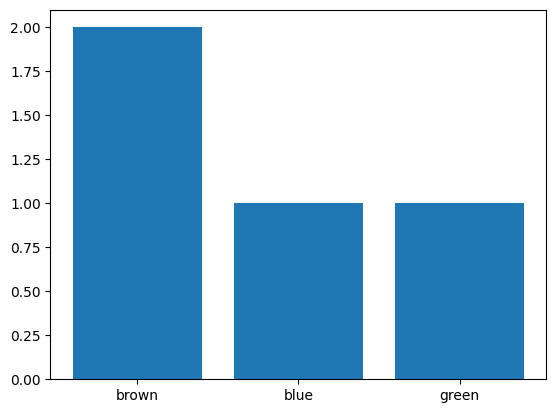

In [224]:
import matplotlib.pyplot as plt

plt.bar(indeces, counts)
plt.show()

______

## Two Important Notes

* It's *VERY* important that you put alot of time into beig mindful with not only what you visualise, but also HOW you visualise it.
* Furthermore, I'm going to require you to read the documentation of the libraries that we use. Including Pandas, matplotlib, Seaborn etc.

We will not have nearly enough time to cover every aspects of the libraries, so it's your responsibility to seek out the information that you need.

_____